In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

## Cycle graph

A cycle is a circuit in which only the first and last vertices are equal.
A graph without cycles is called an acyclic graph.  A connected graph without cycles is called a tree.

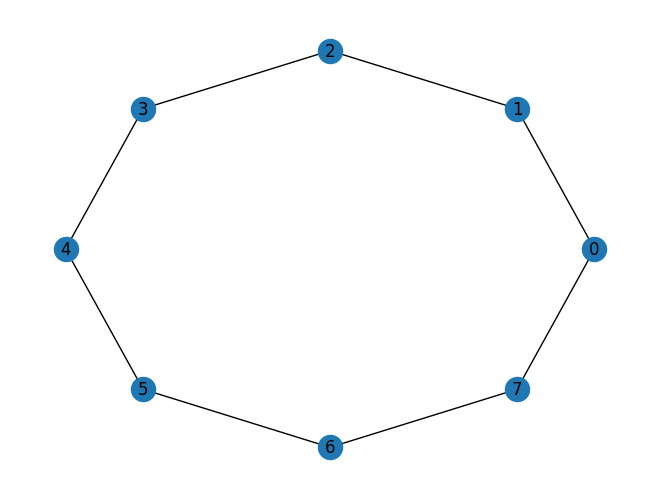

In [3]:
C = nx.cycle_graph(8)
nx.draw_circular(C, with_labels=True)

## complete graph

The complete graph on n vertices is denoted $K_n$
The complement of a complete graph is an empty graph.
$K_n$ has $n(n-1)/2$ edges and is a regular graph of degree $n-1$

$K_1$ through $K_4$ are all planar graphs.  The nonplanar complete graph $K_5$ plays a key role in characterizations of planar graphs via Kuratowski's theorem.  A graph is planar if it does not contain $K_5$ or the complete bipartite graph (Utility Graph) $K_3,_3$

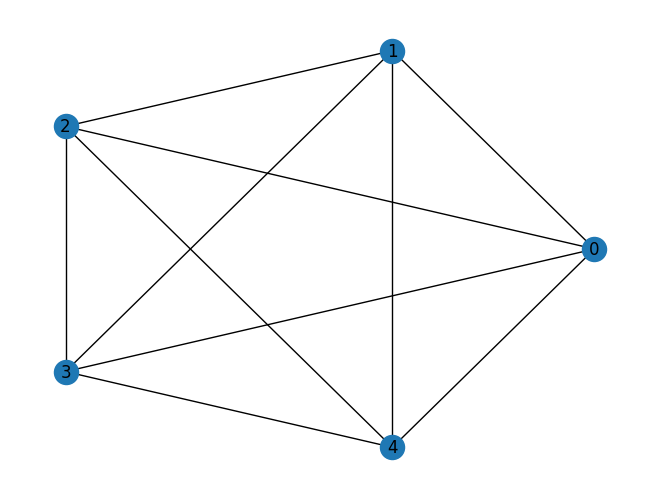

In [3]:
CPLT = nx.complete_graph(5)
nx.draw_circular(CPLT, with_labels=True)

In [5]:
n = len(CPLT.nodes)
len(CPLT.edges) == n * (n-1) / 2

True

## utility graph (complete bipartite graph) $K_3,_3$

$K_3,_3$ is a graph with six vertices and nine edges, often referred to as the utility graph in reference to the Three Utilities Problem and part of the two forbidden graphs characterized by Kazimeirz Kuratowski.

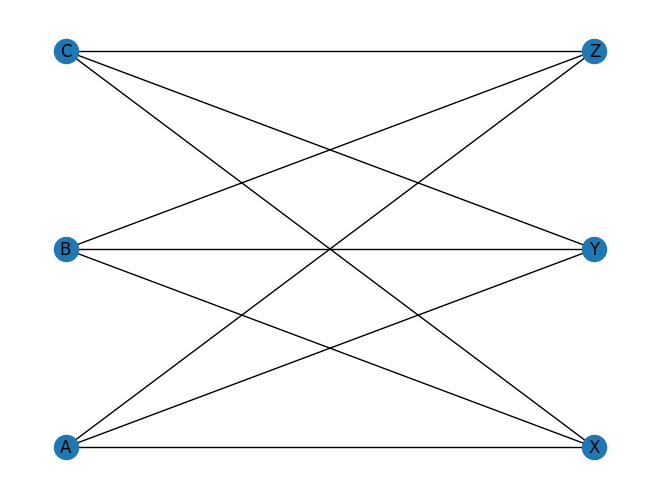

In [7]:
U = nx.Graph()
v_0 = ['A', 'B', 'C']
v_1 = ['X', 'Y', 'Z']
e = [('A','X'), ('A','Y'), ('A', 'Z'),
    ('B', 'X'), ('B', 'Y'), ('B','Z'),
    ('C','X'), ('C','Y'), ('C', 'Z')]
U.add_nodes_from(v_0, bipartite=0)
U.add_nodes_from(v_1, bipartite=1)
U.add_edges_from(e)
pos = nx.bipartite_layout(U, v_0)
nx.draw(U, pos, with_labels=True)

## Null graph

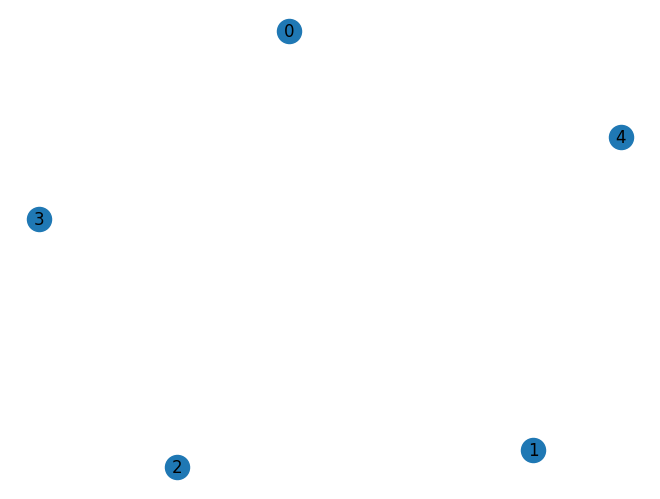

In [13]:
nul = nx.empty_graph(5)
nx.draw(nul, with_labels=True)

## Complement of a graph

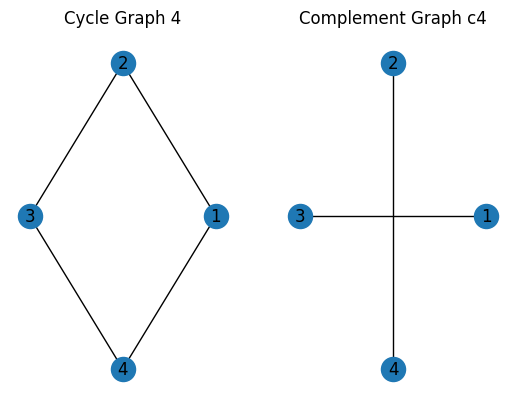

In [24]:
c4 = nx.cycle_graph([1,2,3,4])
c4c = nx.complement(c4)

plt.subplot(121)
nx.draw_circular(c4, with_labels=True)
plt.title('Cycle Graph 4')
plt.subplot(122)
nx.draw_circular(c4c, with_labels=True)
plt.title('Complement Graph c4')
plt.show()

## Degree of a graph

The degree of a vertex in a graph is number of connections it has to other vertices.

In [3]:
D = nx.Graph()
D.add_nodes_from([1,2,3,4,5,6])
D.add_edges_from([(1,3), (1,6),(2,4), (2,6), (3,6), (3,5), (2,5)])
D_degree = dict(D.degree())

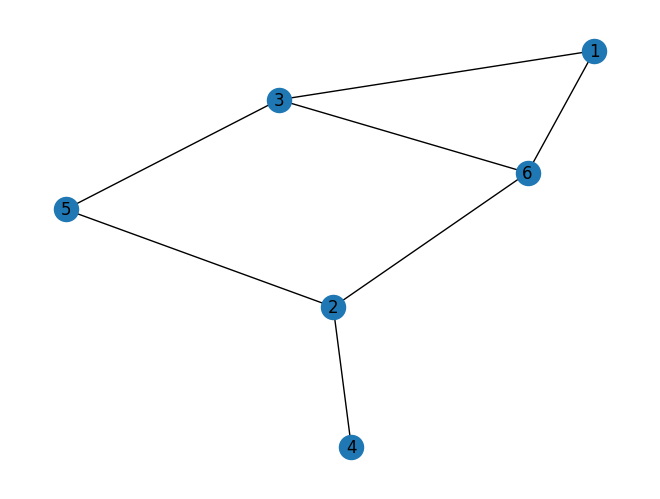

In [5]:
nx.draw(D, with_labels=True)

In [6]:
for node, degree in D_degree.items():
    print(f'{node} has degree {degree}')

1 has degree 2
2 has degree 3
3 has degree 3
4 has degree 1
5 has degree 2
6 has degree 3


## Adjacency matrix

In [9]:
adj_matrix = nx.to_numpy_array(D)
adj_matrix

array([[0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.]])

In [12]:
pd.DataFrame(adj_matrix, index=[1,2,3,4,5,6], columns=[1,2,3,4,5,6])

,1,2,3,4,5,6
1,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0
6,1.0,1.0,1.0,0.0,0.0,0.0


## cycles

In [13]:
graph_cycles = nx.cycle_basis(D)
graph_cycles

[[1, 3, 6], [2, 5, 3, 6]]

In [17]:
for cycle in graph_cycles:
    print(f'4 in {cycle}: {4 in cycle}')

4 in [1, 3, 6]: False
4 in [2, 5, 3, 6]: False


## planarity

If $G$ is a graph that contains a subgraph $H$ that is a subdivision of $K_5$ or $K_3,_3$ then $H$ is known as a Kuratowski subgraph of $G$ With this notation, Kuratowski's theorem can be expressed succinctly: a graph is planar if and only if it does not have a Kuratowski subgraph. 

In [20]:
planar_status, _ = nx.check_planarity(D)
print(planar_status)

True


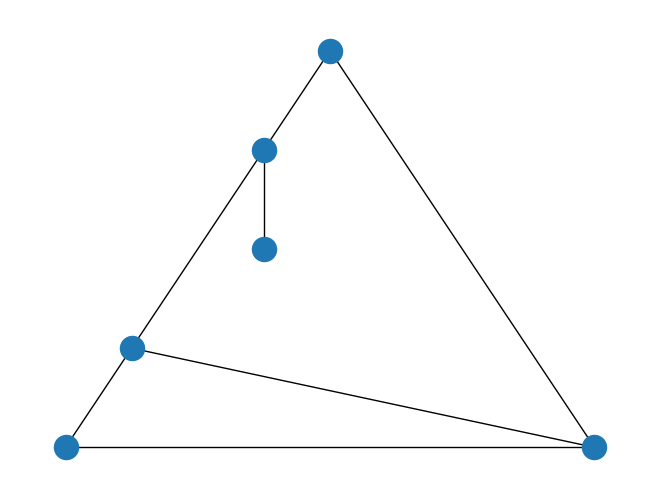

In [21]:
nx.draw_planar(D)

## Isomorphism - Subgraphs

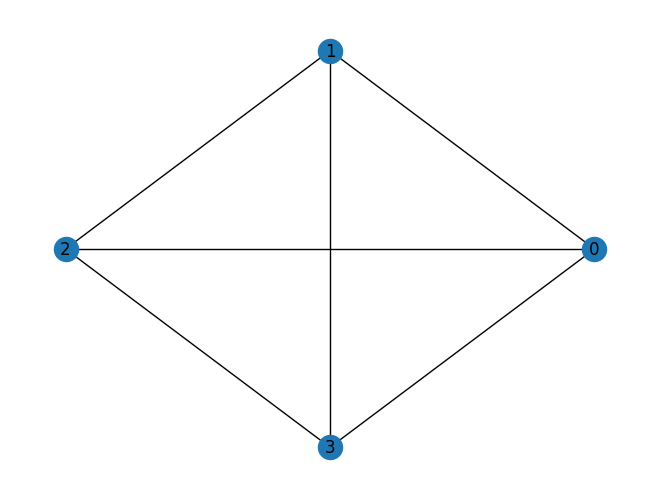

In [5]:
G1 = nx.complete_graph(4)
nx.draw_circular(G1, with_labels=True)

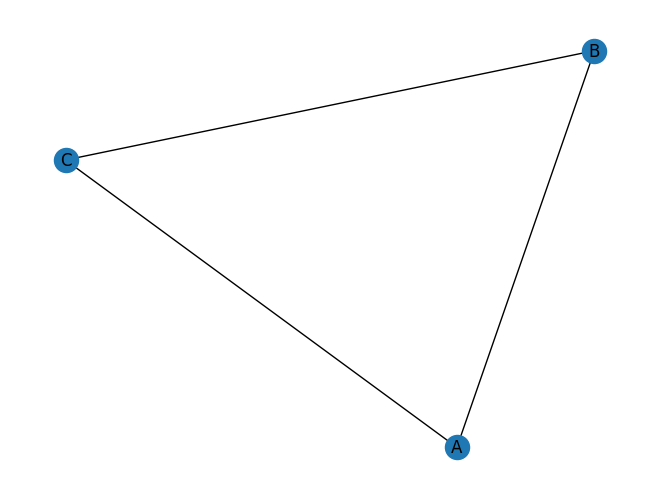

In [13]:
G2 = nx.Graph() 
G2.add_nodes_from(['A', 'B', 'C'])
G2.add_edges_from([('B','C'),('C','A'), ('A','B')])
nx.draw(G2, with_labels=True)

In [15]:
GM_1 = nx.isomorphism.GraphMatcher(G1, G2)

In [16]:
GM_1.subgraph_is_isomorphic()

True

In [17]:
GM_1.mapping

{0: 'A', 1: 'B', 2: 'C'}

## Isomorphism

In [12]:
C4_1 = nx.complete_graph(4)
C4_2 = nx.complete_graph(4)
nx.isomorphism.GraphMatcher(C4_1, C4_2).is_isomorphic()

True

## Connectivity

A graph is said to be connected if every pair of vertices in the graph is connected. This means that there is a path between every pair of vertices. An undirected graph that is not connected is called disconnected. An undirected graph $G$ is therefore disconnected if there exist two vertices in $G$ such that no path in $G$ has these vertices as endpoints. A graph with just one vertex is connected. An edgeless graph with two or more vertices is disconnected. 

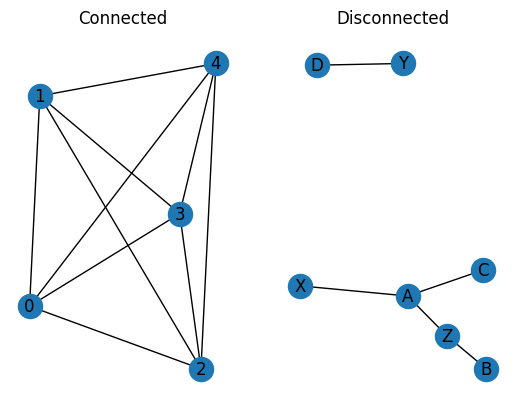

In [5]:
G_con = nx.complete_graph(5)
G_dc = nx.Graph()
V1 = ['A', 'B', 'C', 'D']
V2 = ['X', 'Y', 'Z']
E = [('A','X'), ('A', 'Z'),
    ('B','Z'),
    ('C', 'A'), ('Y', 'D')]
G_dc.add_nodes_from(V1)
G_dc.add_nodes_from(V2)
G_dc.add_edges_from(E)


plt.subplot(121)
nx.draw(G_con, with_labels=True)
plt.title('Connected')
plt.subplot(122)
nx.draw(G_dc, with_labels=True)
plt.title('Disconnected')
plt.show()

In [9]:
print(f'G_con is connected: {nx.is_connected(G_con)} G_dc is connected: {nx.is_connected(G_dc)}')

G_con is connected: True G_dc is connected: False


## Finding Cliques

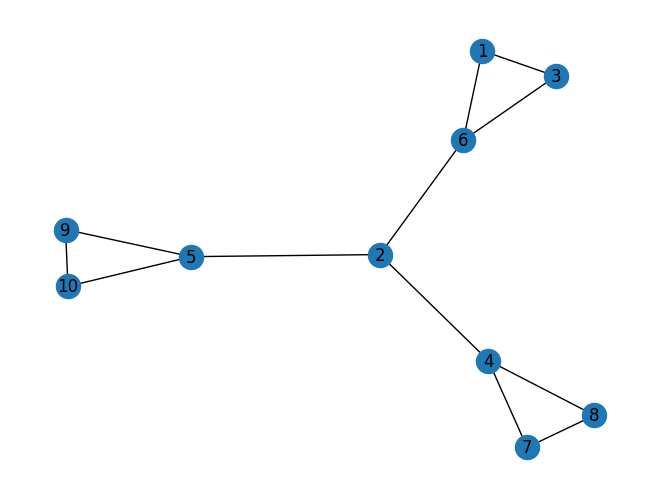

In [9]:
D_clq = nx.Graph()
D_clq.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
D_clq.add_edges_from([(1,3), (1,6),(2,4), (2,6), (3,6), (2,5),(5,9),(9,10),(10,5),(4,7),(7,8),(8,4)])
nx.draw(D_clq, with_labels=True)

In [11]:
cliques = nx.find_cliques(D_clq)
list(cliques)

[[1, 3, 6], [2, 4], [2, 5], [2, 6], [7, 8, 4], [9, 10, 5]]